## Data Preparation

In [3]:
!nvidia-smi

Tue Dec  8 11:28:11 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
!git clone https://github.com/mohanrajmit/IDD.git

Cloning into 'IDD'...
remote: Enumerating objects: 4891, done.
remote: Counting objects: 100% (4891/4891), done.
remote: Compressing objects: 100% (4503/4503), done.
remote: Total 4891 (delta 225), reused 4767 (delta 125), pack-reused 0
Receiving objects: 100% (4891/4891), 28.67 MiB | 27.26 MiB/s, done.
Resolving deltas: 100% (225/225), done.


In [5]:
import cv2
from imutils import paths

In [6]:
%%capture
labels_path = paths.list_images("/content/IDD/idd20k_lite/gtFine")
labels_path = sorted(labels_path)
for i in labels_path:
  print(i)


In [7]:
def binarylab(labels_name):
  #counter=0
  #print(labels_name.shape)
  x = np.zeros([227,320,8])
  for i in range(227):
    for j in range(320):      
      if (labels_name[i][j]==255):
        #print(counter)
        x[i,j,7]=1
      else:
        x[i,j,labels_name[i][j]]=1
  print(x)
  return x

In [8]:
%%capture
train_labels = []
val_labels = []
train_labels_conv = []
val_labels_conv = []

import numpy as np
for imagePath in labels_path:
  #print(imagePath)
  make = imagePath.split("/")[-3]
  #print(make)
  image = cv2.imread(imagePath)
  b,g,r = cv2.split(image)
  binary_label = binarylab(r)
  if make == "train":
    train_labels.append(image)
    train_labels_conv.append(binary_label)
  else:
    val_labels.append(image)
    val_labels_conv.append(binary_label)
#print(imagePath[0])

In [9]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
train_labels_conv = np.array(train_labels_conv)
val_labels_conv = np.array(val_labels_conv)
#sample= train_laebls[0]
print(train_labels.shape)

(1403, 227, 320, 3)


In [10]:
train_labels1 = train_labels_conv.reshape(1403,72640,8)

val_labels1 = val_labels_conv.reshape(204,72640,8)

In [11]:
print(train_labels1.shape)
print(val_labels1.shape)

(1403, 72640, 8)
(204, 72640, 8)


In [12]:
images_path=paths.list_images("/content/IDD/idd20k_lite/leftImg8bit")
images_path=sorted(images_path)
for i in images_path:
  print(i)

/content/IDD/idd20k_lite/leftImg8bit/test/103/206393_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/103/331011_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/103/416301_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/103/478626_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/103/665169_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/103/881873_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/103/981216_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/105/013276_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/105/017939_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/109/004065_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/109/005571_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/109/014818_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/109/016532_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/109/018066_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/109/026122_image.jpg
/content/IDD/idd20k_lite/leftImg8bit/test/111/000502_im

In [13]:
train_images = []
val_images = []
test_images = []
import numpy as np
for imagePath in images_path:
  #print(imagePath)
  make = imagePath.split("/")[-3]
  #print(make)
  image = cv2.imread(imagePath)
  if make == "train":
    train_images.append(image)
  elif make == "test":
    test_images.append(image)
  else:
    val_images.append(image)

In [14]:
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)

In [15]:
print(train_images.shape)
print(test_images.shape)
print(val_images.shape)

(1403, 227, 320, 3)
(404, 227, 320, 3)
(204, 227, 320, 3)


(227, 320, 3)
(227, 320, 3)


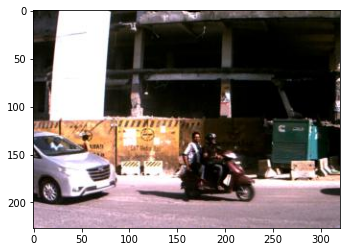

In [16]:
sample_image_label = train_labels[1]
sample_image = train_images[1]
print(sample_image_label.shape)
print(sample_image.shape)
from matplotlib import pyplot as plt
import imutils
plt.figure("original_image")
plt.imshow(imutils.opencv2matplotlib(sample_image))

In [17]:

colors = np.array([
    [128, 64, 18],      # Drivable
    [244, 35, 232],     # Non Drivable
    [220, 20, 60],      # Living Things
    [0, 0, 230],        # Vehicles
    [220, 190, 40],     # Road Side Objects
    [70, 70, 70],       # Far Objects
    [70, 130, 180],     # Sky
    [0, 0, 0]           # Misc
], dtype=np.int)

def visualize(temp, plot=True):
    r,g,b =cv2.split(temp)
    color_image = np.zeros(
        (r.shape[0], r.shape[1], 3), dtype=np.int)
    for i in range(7):
        color_image[r == i] = colors[i]

    color_image[r == 255] = colors[7]
    #plt.imshow(image_frame)
    plt.imshow(color_image)
    plt.show()

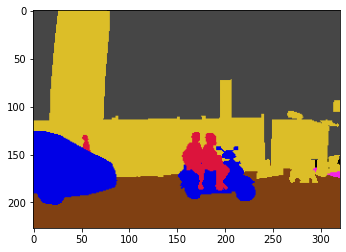

In [18]:
visualize(sample_image_label)

In [19]:
import tensorflow

In [20]:
 %tensorflow_version 1.x 

TensorFlow is already loaded. Please restart the runtime to change versions.


In [21]:
!which keras

In [22]:
# pip install keras-rectified-adam
!pip install keras-radam

  Created wheel for keras-radam: filename=keras_radam-0.15.0-cp36-none-any.whl size=14686 sha256=f4a3fd91243110a7c10669b83681a0654fb937c78fc741fc4ff7a97a1131c300
  Stored in directory: /root/.cache/pip/wheels/79/a0/c0/670b0a118e8f078539fafec7bd02eba0af921f745660c7f83f
Successfully built keras-radam


## Model

In [23]:
import keras.models as models
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
# from keras.layers import Layer, Dense, Dropout, Activation, Flatten, Reshape, Permute
from keras.layers.convolutional import Convolution2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint
from keras.layers import merge
from keras_radam import RAdam

ImportError: ignored

In [ ]:
!pip install keras-radam

In [ ]:
opt = RAdam(total_steps=5000, warmup_proportion=0.1, min_lr=1e-5)

In [ ]:
from keras import backend as K
K.set_image_data_format('channels_last')
from keras.layers import Lambda, Input
import tensorflow as tf

#from keras.backend import tf as ktf

Model architecture

In [ ]:
def create_encoding_layers():
    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2
    return [
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(filter_size, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(2, 2),strides=2),

        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(128, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size),strides=2),

        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(256, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
        MaxPooling2D(pool_size=(pool_size, pool_size),strides=2),

        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(512, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
        Activation('relu'),
    ]

def create_decoding_layers():
    kernel = 3
    filter_size = 64
    pad = 1
    pool_size = 2
    return[
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(512, kernel, kernel, border_mode='valid'),
        BatchNormalization(),

        UpSampling2D(size=(pool_size,pool_size)),
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(256, kernel, kernel, border_mode='valid'),
        BatchNormalization(),

        UpSampling2D(size=(pool_size,pool_size)),
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(128, kernel, kernel, border_mode='valid'),
        BatchNormalization(),

        UpSampling2D(size=(pool_size,pool_size)),
        ZeroPadding2D(padding=(pad,pad)),
        Convolution2D(filter_size, kernel, kernel, border_mode='valid'),
        BatchNormalization(),
    ]


data_shape = 227*320

segnet_basic = models.Sequential()

# Adding layers 
segnet_basic.add(Layer(input_shape=(227,320,3)))

segnet_basic.encoding_layers = create_encoding_layers()
for l in segnet_basic.encoding_layers:
    segnet_basic.add(l)

# Note: it this looks weird, that is because of adding Each Layer using that for loop
# instead of re-writting mode.add(somelayer+params) everytime.

segnet_basic.decoding_layers = create_decoding_layers()
for l in segnet_basic.decoding_layers:
    segnet_basic.add(l)

#segnet_basic.add(ZeroPadding2D(padding=(2,0)))

segnet_basic.add(Convolution2D(8, 1, 1, border_mode='valid'))
segnet_basic.add(Lambda(lambda image: tf.image.resize_images(image,(227,320))))
#segnet_basic.add(Reshape(-1,3), input_shape=(224,320,7))
#segnet_basic.add(Lambda(lambda x: x[:508480])) # throw away some, so that #data = 224^2
#segnet_basic.add(Reshape(227,320,7))

segnet_basic.add(Reshape((data_shape,8), input_shape=(227,320,8)))
#segnet_basic.add(Permute((2, 1)))
segnet_basic.add(Activation('softmax'))
segnet_basic.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [ ]:
segnet_basic.summary()

Model Training

In [ ]:
from matplotlib import pyplot as plt
import imutils
plt.figure("original_image")
plt.imshow(imutils.opencv2matplotlib(train_images[2]))

In [ ]:
# load the data
# train_data = np.load('./data/train_data.npy')
# train_label = np.load('./data/train_label.npy')

# test_data = np.load('./data/test_data.npy')
# test_label = np.load('./data/test_label.npy')

In [ ]:
# # load the data
# train_data = np.load('./data/train_images.npy')
# train_label = np.load('./data/train_label.npy')

# test_data = np.load('./data/test_data.npy')
# test_label = np.load('./data/test_label.npy')

In [ ]:
nb_epoch = 5
batch_size = 16

history = segnet_basic.fit(train_images, train_labels1, batch_size=batch_size,epochs=nb_epoch,verbose=1, validation_data=(val_images, val_labels1))
#segnet_basic.save_weights('model_weight_ep100.hdf5')
#score = autoencoder.evaluate(X_test, X_test, show_accuracy=True, verbose=0)
#print('Test score:', score[0])
#print('Test accuracy:', score[1])

## Testing the trainied Model

In [ ]:
test_path= paths.list_images("/content/IDD/idd20k_lite/leftImg8bit/current")
test_path=sorted(test_path)
for i in test_path:
  print(i)

In [ ]:
test_images_final = []
test_images_name = []
import os
for imagePath in test_path:
  image=cv2.imread(imagePath)
  print(imagePath)
  make = imagePath.split("/")[-1]
  filename = make[:make.rfind("_")]
  print(filename)
  make1=imagePath.split("/")[-2]  
  directory="output/"+ make1
  if not os.path.exists(directory):
    os.makedirs(directory)
  image_name = "output/"+ make1+"/"+filename+"_label.png"
  test_images_final.append(image)
  test_images_name.append(image_name)


In [ ]:
test_images_final = np.array(test_images_final)

## Model Prediction

In [ ]:
output = segnet_basic.predict_proba(test_images_final, verbose=0)
output = output.reshape(output.shape[0],227,320,8)

In [ ]:
# from matplotlib import pyplot as plt
# import imutils
# plt.figure("original_image")
# rgb2rgr=cv2.cvtColor(output.shape[1], cv2.COLOR_BGR2RGB)
# plt.imshow(imutils.opencv2matplotlib(rgb2rgr))
# print(rgb2rgr.shape)
# print(rgb2rgr.shape[0])

In [ ]:
# for i in range(output.shape[0]):
#   #print(i)
#   sample_pred = np.argmax(output[i],axis=-1)
#   #print(sample_pred.shape)
#   #image_name = "output/" + str(image_counter) + ".png"
#   sample_pred[sample_pred == 7] = 255
#   #color_image[label_map == 255] = colors[7]
#   cv2.imwrite(test_images_name[i],sample_pred)

Saving the results

In [ ]:
!zip -r output.zip output

Download the output

In [ ]:
from google.colab import files
files.download('/content/output.zip') 

In [ ]:
# !sudo apt install zip unzip